# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
athletes = pd.read_csv("athletes.csv")

In [3]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [4]:
# Sua análise começa aqui.
altura = get_sample(athletes, "height", 3000)
altura

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
7975     2.02
4430     1.78
7293     1.57
2248     1.59
5109     1.82
9053     1.68
8945     1.51
9452     1.78
10366    1.65
4223     1.81
9513     1.65
7616     1.59
7269     1.70
3684     1.63
6142     1.65
6578     1.76
4683     1.73
2170     1.88
7607     1.86
11358    1.77
1770     1.96
4576     1.96
9093     1.88
2082     1.82
9901     1.74
         ... 
1662     1.98
2813     1.85
6692     1.63
3073     1.90
10716    1.87
673      1.74
2943     1.78
911      1.60
5582     1.79
2369     1.75
9206     1.58
1674     1.75
572      1.63
10434    1.83
8680     1.78
8662     1.87
9420     1.70
3630     1.88
5503     1.76
223      1.68
9712     1.80
11022    1.93
9269     1.65
9818     1.70
75       2.03
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [5]:
def q1():
    # Retorne aqui o resultado da questão 1.
    static, p_value = sct.shapiro(get_sample(athletes, "height", 3000))
    return p_value > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q2():
    static, p_value = sct.jarque_bera(get_sample(athletes, "height", 3000))
    return p_value > 0.05

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [7]:
def q3():
    static, p_value = sct.normaltest(get_sample(athletes, "weight", 3000))
    return p_value > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

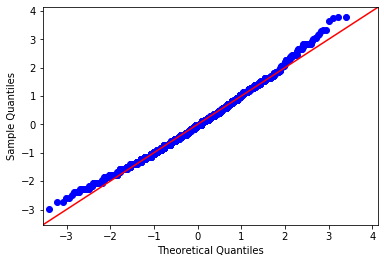

In [8]:
def q4():
    static, p_value = sct.normaltest(np.log(get_sample(athletes, "weight", 3000)))
    return p_value > 0.05
sm.qqplot(np.log(get_sample(athletes, "weight", 3000)), fit=True, line="45");

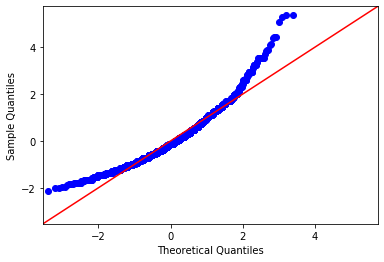

In [9]:
sm.qqplot(get_sample(athletes, "weight", 3000), fit=True, line="45");

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [10]:
def q5():
    bra = athletes[athletes['nationality'] == 'BRA'] 
    usa = athletes[athletes['nationality'] == 'USA']
    static, p_value = sct.ttest_ind(bra["height"].dropna(), usa["height"].dropna(), equal_var = False)
    return p_value > 0.05

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [14]:
def q6():
    bra = athletes[athletes['nationality'] == 'BRA'] 
    can = athletes[athletes['nationality'] == 'CAN']
    static, p_value = sct.ttest_ind(bra["height"].dropna(), can["height"].dropna(), equal_var = False)
    return p_value > 0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [17]:
def q7():
    usa = athletes[athletes['nationality'] == 'USA'] 
    can = athletes[athletes['nationality'] == 'CAN']
    static, p_value = sct.ttest_ind(usa["height"].dropna(), can["height"].dropna(), equal_var = False)
    return round(p_value,8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?